In [2]:
!nvidia-smi


'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
if tf.test.is_gpu_available():
    print("GPU is available for TensorFlow.")
    print("GPU devices:", tf.config.list_physical_devices('GPU'))
else:
    print("GPU is NOT available for TensorFlow.")


TensorFlow version: 2.20.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT available for TensorFlow.


In [4]:
import pandas as pd
import numpy as np


In [5]:
# pd.read_csv("dataset/spam.csv", encoding="latin-1")


In [6]:
# import shutil
# import os

# # Move kaggle.json to ~/.kaggle
# os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
# shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
# os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)


In [7]:
!ls


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!ls sms-spam-collection-dataset


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
import pandas as pd

df = pd.read_csv("dataset/spam.csv", encoding='latin-1' , usecols=['v1', 'v2'])
df.columns = ['target', 'text']  # Rename columns
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
df.shape


(5572, 2)

In [22]:
# data cleanup 
# EDA
# text preprocessing
# model building
# evaluation
# hyperparameter tuning
# website creation
# deployment



In [23]:
# data cleaning
# 1. already done while loading the data
# rename the columns already done  but 
# 2. check for null values


In [24]:
df.isna().sum()


target    0
text      0
dtype: int64

In [30]:
df.columns


Index(['target', 'text'], dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

# encode the target labels
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])


In [32]:
# duplicated rows
df.duplicated().sum()


np.int64(0)

In [33]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [34]:
df.shape


(5169, 2)

In [35]:
# EDA
import matplotlib.pyplot as plt 
import seaborn as sns



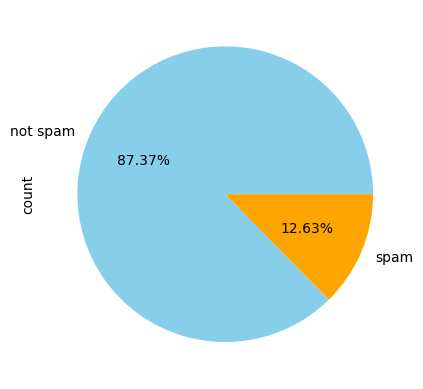

In [36]:
# how much spam and ham messages are there
df['target'].value_counts().plot(kind='pie' , labels=['not spam', 'spam'], autopct='%.2f%%', colors=['skyblue', 'orange'])
plt.show()





In [37]:
# Data is imbalanced with more not spam messages than spam messages


In [38]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Crashlar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Crashlar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [39]:
df['num_character'] = df['text'].apply(len)


In [40]:
df.head()


,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))



In [42]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [43]:
df.head()


,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['num_character', 'num_words', 'num_sentences']].describe()


,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham messages
df[df['target'] == 0 ][['num_character', 'num_words', 'num_sentences']].describe()


,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# spam messages
df[df['target'] == 1 ][['num_character', 'num_words', 'num_sentences']].describe()


,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

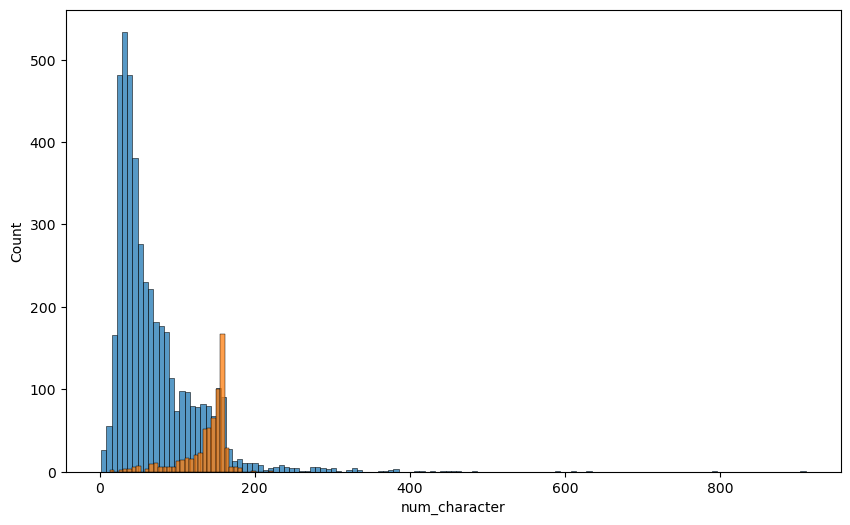

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0 ]['num_character'])
sns.histplot(df[df['target'] == 1 ]['num_character'])



<Axes: xlabel='num_words', ylabel='Count'>

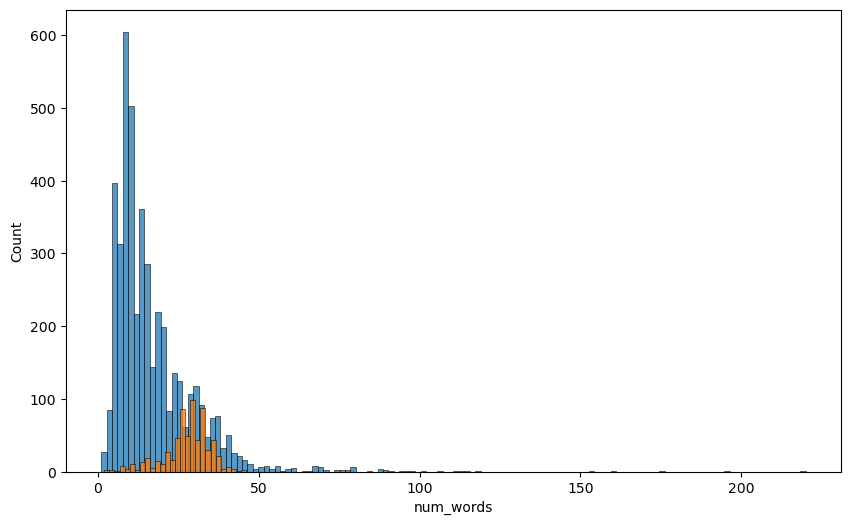

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0 ]['num_words'])
sns.histplot(df[df['target'] == 1 ]['num_words'])



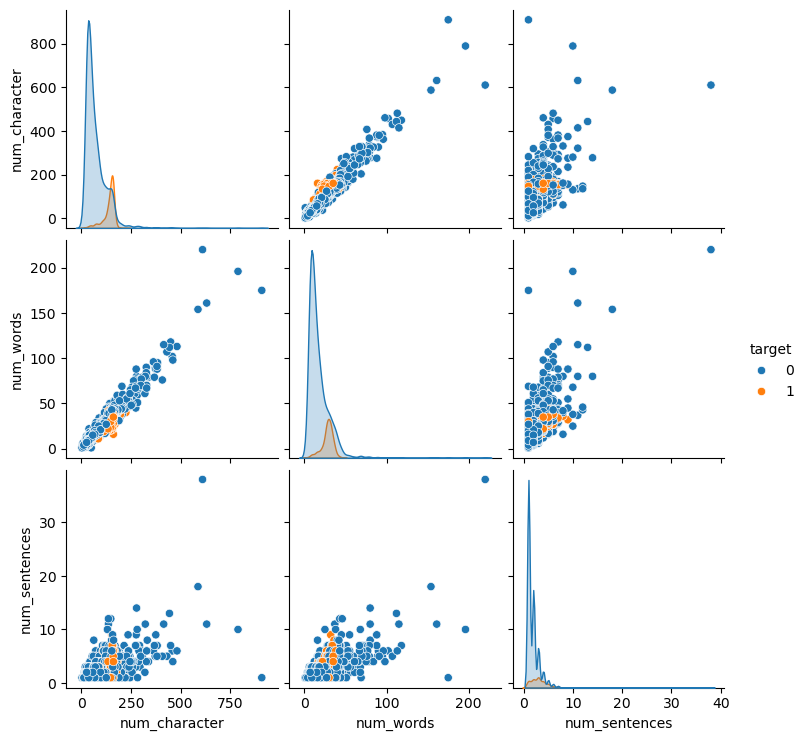

In [62]:
# colm relationship analysis

sns.pairplot(df, hue='target')


In [67]:
# too much outliers have 



<Axes: >

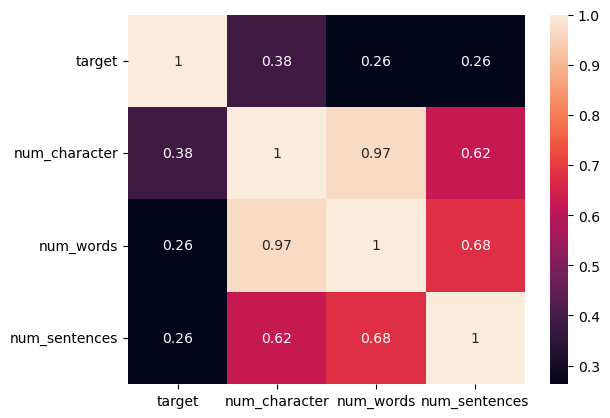

In [69]:
sns.heatmap(df[['target','num_character', 'num_words', 'num_sentences']].corr() , annot=True)


In [70]:
# strong relationship between num_character and num_words


In [71]:
# text preproccessing

# lower case
# tokenization
# remove special characters
# remove stop words and punctuation
# stemming / lemmatization


In [125]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('stopwords')


def transform_text(text):

    # lower case
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)

    # removing special characters
    # alphanumeric characters remain here 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # making a copy of y
    y.clear()

    # removing stop words and punctuation
    # not having means in sentence
    
    stop_words = stopwords.words('english')

    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()

    # stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    

    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Crashlar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
# transform_text("Hello World! This is a Sample running Text.")
# transform_text("running runners ran easily")


In [133]:
transform_text(df['text'][34])


'thank subscript rington uk mobil charg pleas confirm repli ye repli charg'

In [135]:
df['transformed_text'] = df['text'].apply(transform_text)


In [136]:
df.head()


,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
# word cloud, most common words, length of messages

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [146]:
plt.figure(figsize=(15,10))
spam_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep = " "))


<Figure size 1500x1000 with 0 Axes>

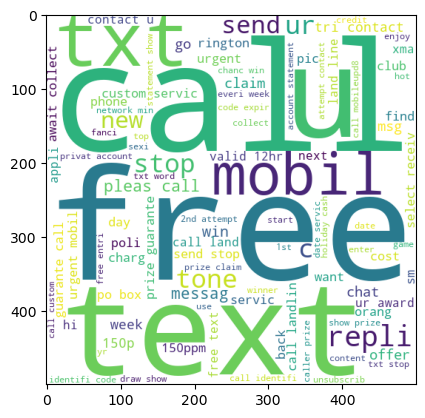

In [147]:
plt.imshow(spam_wc)


In [148]:
plt.figure(figsize=(15,6))
spam_wc = wc.generate(df[df['target'] == 0 ]['transformed_text'].str.cat(sep = " "))


<Figure size 1500x600 with 0 Axes>

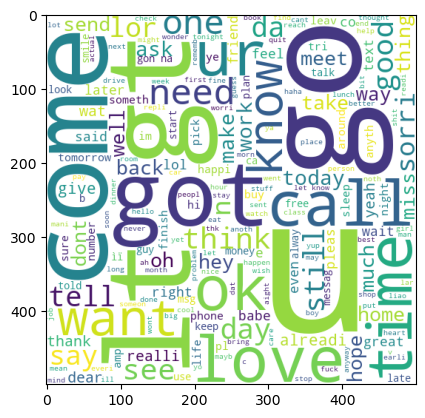

In [152]:
# ham message 
plt.imshow(spam_wc)
plt.show()



In [ ]:
# df.head()
# 


,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [179]:
spam_corpus = []
for message in df[df['target'] == 1 ]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)


In [180]:
len(spam_corpus)


9939

In [181]:
from collections import Counter


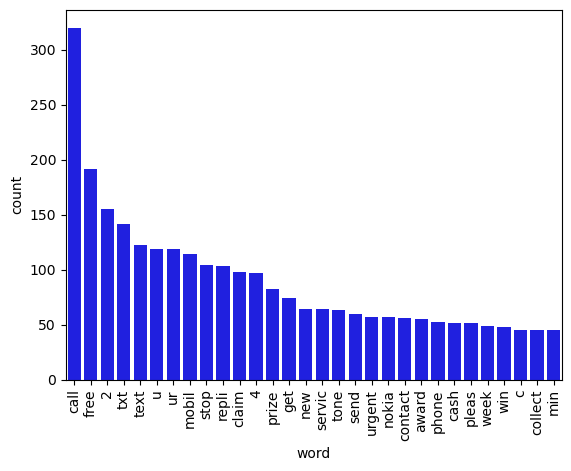

In [182]:
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# plot
sns.barplot(x='word', y='count', data=common_words , color='blue')
plt.xticks(rotation=90)
plt.show()


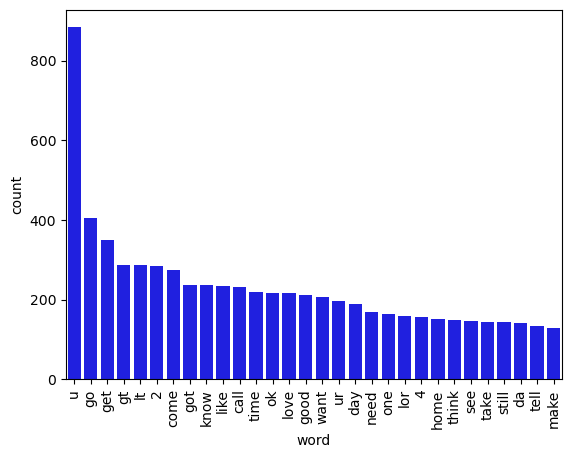

In [183]:
ham_corpus = []
for message in df[df['target'] == 0 ]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)


common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# plot
sns.barplot(x='word', y='count', data=common_words , color='blue')
plt.xticks(rotation=90)
plt.show()


In [184]:
# using naive bayes classifier model


In [ ]:
# change in vectorization technique from CountVectorizer or TfidfVectorizer
# BOW



In [186]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()


In [ ]:
X.shape


(5169, 6708)

In [ ]:
y = df['target'].values
y 


array([0, 0, 1, ..., 0, 0, 0])

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [202]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussion : ", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("precision : ", precision_score(y_test, y_pred1))

print("\n")
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("multinomial : ",accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print("precision : ", precision_score(y_test, y_pred2))

print()

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli : ", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print("precision : ", precision_score(y_test, y_pred3))



Gaussion :  0.8684719535783365
[[772 117]
 [ 19 126]]
precision :  0.5185185185185185


multinomial :  0.9738878143133463
[[872  17]
 [ 10 135]]
precision :  0.8881578947368421

Bernoulli :  0.9661508704061895
[[885   4]
 [ 31 114]]
precision :  0.9661016949152542


In [203]:
# bernoulli is performing better than other two models
#  --- IGNORE ---


In [204]:
# using TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [207]:
# using tfidf vectorizer

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussion : ", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("precision : ", precision_score(y_test, y_pred1))

print("\n")
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("multinomial : ",accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print("precision : ", precision_score(y_test, y_pred2))

print()

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli : ", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print("precision : ", precision_score(y_test, y_pred3))




Gaussion :  0.8636363636363636
[[772 117]
 [ 24 121]]
precision :  0.5084033613445378


multinomial :  0.9613152804642167
[[888   1]
 [ 39 106]]
precision :  0.9906542056074766

Bernoulli :  0.9661508704061895
[[885   4]
 [ 31 114]]
precision :  0.9661016949152542


In [ ]:
# presion is better in multinomial naive bayes model with tfidf vectorizer
# precision matter 

# using 
# tfidf -> MNB


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier, ExtraTreesClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier


In [212]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [215]:
svc = SVC(kernel='sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2 )
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)


In [216]:
clfs = {
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LRC' : lrc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC'  : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'XGB' : xgb
}


In [ ]:
# sample run
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [218]:
train_classifier(svc , X_train, y_train, X_test, y_test)


(0.971953578336557, 0.9393939393939394)

In [219]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For {name} accuracy is {current_accuracy} and precision is {current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC accuracy is 0.971953578336557 and precision is 0.9393939393939394


c:\Users\Crashlar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Crashlar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Crashlar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Crashlar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

For KNC accuracy is 0.8965183752417795 and precision is 1.0
For MNB accuracy is 0.9613152804642167 and precision is 0.9906542056074766
For DTC accuracy is 0.9361702127659575 and precision is 0.816
For LRC accuracy is 0.9439071566731141 and precision is 0.865546218487395
For RFC accuracy is 0.9700193423597679 and precision is 0.9913793103448276
For ABC accuracy is 0.9148936170212766 and precision is 0.7878787878787878
For BC accuracy is 0.9613152804642167 and precision is 0.8776978417266187
For ETC accuracy is 0.9738878143133463 and precision is 0.9916666666666667
For GBDT accuracy is 0.9506769825918762 and precision is 0.9519230769230769
For XGB accuracy is 0.9748549323017408 and precision is 0.9612403100775194


In [231]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision' , ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KNC,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RFC,0.970019,0.991379
2,MNB,0.961315,0.990654
10,XGB,0.974855,0.961240
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BC,0.961315,0.877698
4,LRC,0.943907,0.865546
3,DTC,0.936170,0.816000


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KNC,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RFC,Accuracy,0.970019
3,MNB,Accuracy,0.961315
4,XGB,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BC,Accuracy,0.961315
8,LRC,Accuracy,0.943907
9,DTC,Accuracy,0.936170


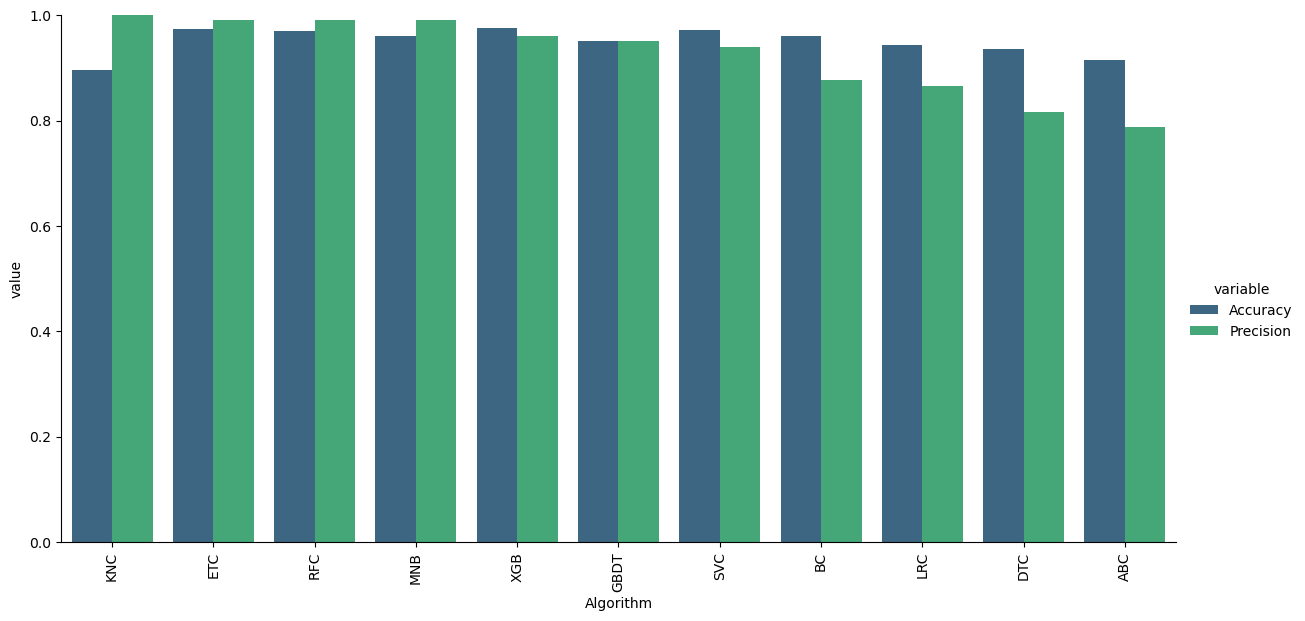

In [232]:
sns.catplot(x='Algorithm', 
            y='value',
             hue = 'variable', data=performance_df1, kind='bar', height=6, aspect=2, palette='viridis')

plt.ylim(0., 1)
plt.xticks(rotation='vertical')
plt.show()




In [ ]:
# model improving 

# 1. change the max features parameter in the iftdf vectorizer


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:

new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNC,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000
1,ETC,0.973888,0.991667,0.973888,0.991667,0.973888,0.991667,0.973888,0.991667
2,RFC,0.970019,0.991379,0.970019,0.991379,0.970019,0.991379,0.970019,0.991379
3,MNB,0.961315,0.990654,0.961315,0.990654,0.961315,0.990654,0.961315,0.990654
4,XGB,0.974855,0.961240,0.974855,0.961240,0.974855,0.961240,0.974855,0.961240
5,GBDT,0.950677,0.951923,0.950677,0.951923,0.950677,0.951923,0.950677,0.951923
6,SVC,0.971954,0.939394,0.971954,0.939394,0.971954,0.939394,0.971954,0.939394
7,BC,0.961315,0.877698,0.961315,0.877698,0.961315,0.877698,0.961315,0.877698
8,LRC,0.943907,0.865546,0.943907,0.865546,0.943907,0.865546,0.943907,0.865546
9,DTC,0.936170,0.816000,0.936170,0.816000,0.936170,0.816000,0.936170,0.816000


In [239]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [241]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [242]:
voting.fit(X_train,y_train)


,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [243]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9825918762088974
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [245]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9825918762088974
Precision 0.9635036496350365


In [246]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [250]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create and train the vectorizer and model on the full dataset
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

svm = SVC(kernel ='sigmoid',degree =	3,gamma 	=1.0,coef0=	0.0,shrinking= 	True,probability =	True,tol =	0.001,cache_size =	200,class_weight =	None,verbose= 	False,max_iter =	-1,decision_function_shape='ovr',break_ties =	False ,random_state 	=None)
svm.fit(X, y)

# Save the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
